In [37]:
import functions
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import matplotlib_inline

In [2]:
tickers = ['AAPL', 'JPM', 'PEGY', 'TSM', 'LINEAR', 'SINWAV', 'TRIANGLE']

In [3]:
parent_out = [pd.read_csv(f'results/{tick}_parent_1.csv') for tick in tickers]
mod_out = [pd.read_csv(f'results/{tick}_modified_1.csv') for tick in tickers]

In [10]:
pd.concat([parent_out[0].head(),parent_out[0].tail(), mod_out[0].head(), mod_out[0].tail()])

,Date,Pred,True
0,2018-01-02,40.950493,40.950493
1,2018-01-03,41.371412,40.943375
2,2018-01-04,40.814580,41.133545
3,2018-01-05,41.085705,41.601864
4,2018-01-08,40.721684,41.447346
497,2019-12-23,68.877964,69.557106
498,2019-12-24,69.844206,69.623238
499,2019-12-26,70.190799,71.004593
500,2019-12-27,70.190799,70.977623
501,2019-12-30,70.361995,71.398895


In [24]:
out = [functions.make_dataframe([parent_out[i].Date, parent_out[i]['True'], parent_out[i].Pred, mod_out[i].Pred], cols = ['Date', 'True', 'Parent_pred', 'Mod_pred']) for i in range(len(parent_out))]

In [82]:
for i in range(len(out)):
	out[i].to_csv(f'results/results_abs/{tickers[i]}_abs.csv')

In [51]:
norm_out = [i.copy() for i in out]
for i in range(len(norm_out)):
	asdf, scaler = functions.get_normalized(pd.DataFrame(np.concatenate([norm_out[i]['True'].values, norm_out[i].Parent_pred.values, norm_out[i].Mod_pred.values]), columns=['Adj Close']))
	norm_out[i]['True'] = scaler.transform(norm_out[i]['True'].values.reshape((-1,1))).reshape((-1))
	norm_out[i].Parent_pred = scaler.transform(norm_out[i].Parent_pred.values.reshape((-1,1))).reshape((-1))
	norm_out[i].Mod_pred = scaler.transform(norm_out[i].Mod_pred.values.reshape((-1,1))).reshape((-1))

In [54]:
# Regularizing lengths
for i in range(len(norm_out)):
	print(norm_out[i].shape, end='')
	if norm_out[i].shape[0] == 503:
		norm_out[i] = norm_out[i].iloc[:-1,:]
	print(norm_out[i].shape)

(502, 4)(502, 4)
(503, 4)(502, 4)
(502, 4)(502, 4)
(502, 4)(502, 4)
(503, 4)(502, 4)
(503, 4)(502, 4)
(503, 4)(502, 4)


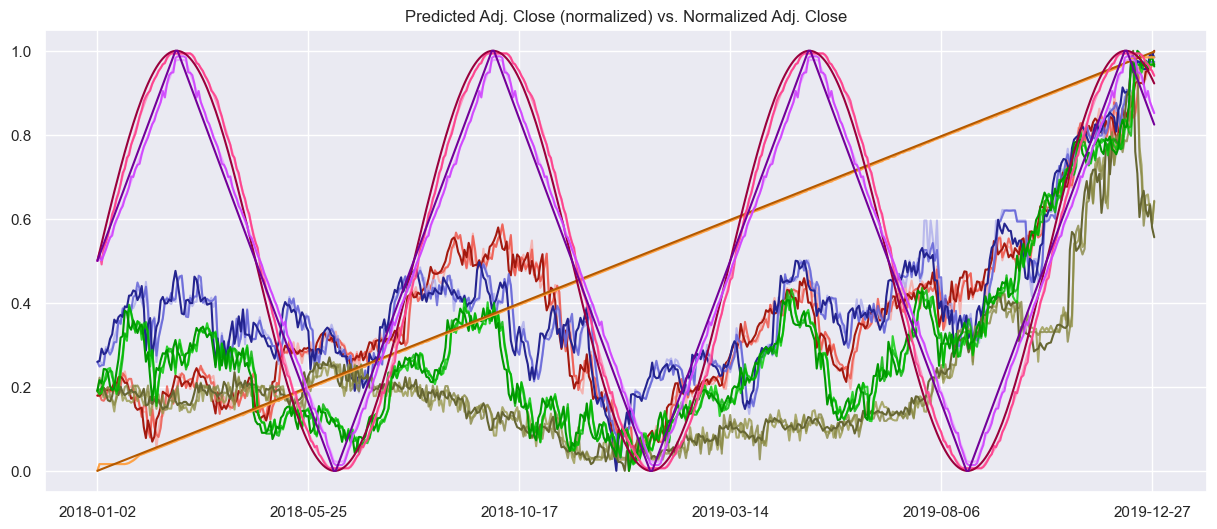

In [63]:
# Display parent paper train actual vs predicted

date_ori = pd.to_datetime(norm_out[0].Date).tolist()
date_original=pd.Series(date_ori).dt.strftime(date_format='%Y-%m-%d').tolist()
color_true = ['#a3190f', '#24248f', '#666633', '#009900', "#b35900", '#99003d', '#730099']
color_mod = ['#ee5044', '#5c5cd6', '#888844', '#00b300', '#ff9933', '#ff3385', '#cc33ff']
color_parent = ['#f6a7a2', '#adadeb', '#99994d', '#00cc00', '#ffbf80', '#ff80b3', '#e699ff']

plt.figure(figsize = (15,6))
for i in range(len(norm_out)):
	x_range = np.arange(norm_out[i].shape[0])
	plt.plot(x_range, norm_out[i]['Parent_pred'], label = f'{tickers[i]} Parent pred.', color=color_parent[i], alpha=0.8)
	plt.plot(x_range, norm_out[i]['Mod_pred'], label = f'{tickers[i]} Modified pred.', color=color_mod[i], alpha=0.8)
	plt.plot(x_range, norm_out[i]['True'], label = f'{tickers[i]} Close (normalized)', color=color_true[i], alpha=1)
# plt.legend()
plt.xticks(x_range[::100], date_original[::100])
plt.title('Predicted Adj. Close (normalized) vs. Normalized Adj. Close')
plt.show()

In [72]:
parent_acc = [pd.read_csv(f'results/{tick}_parent_1_accuracy.csv') for tick in tickers]
parent_acc = pd.concat([acc for acc in parent_acc])
mod_acc = pd.read_csv(f'results/mod_1_accuracy.csv')

In [73]:
true_tickers = ('JPM', 'AAPL', 'PEGY', 'TSM', 'SINWAV', 'LINEAR', 'TRIANGLE')
mod_acc['TICK'] = true_tickers
mod_acc

,Accuracy,Trend Accuracy,TICK
0,0.972219,0.516899,JPM
1,0.985452,0.500000,AAPL
2,0.975575,0.507968,PEGY
3,0.984839,0.498008,TSM
4,0.998051,0.918489,SINWAV
5,0.999925,0.998012,LINEAR
6,0.997538,0.916501,TRIANGLE


In [74]:
parent_acc['TICK'] = tickers
parent_acc

,Accuracy,Trend Accuracy,TICK
0,0.983950,0.534930,AAPL
0,0.969282,0.537849,JPM
0,0.973933,0.526946,PEGY
0,0.985347,0.514970,TSM
0,0.999940,0.998008,LINEAR
0,0.998276,0.948207,SINWAV
0,0.997856,0.952191,TRIANGLE


In [76]:
mod_acc.to_csv('results/mod_acc_compiled_1.csv')
parent_acc.to_csv('results/parent_acc_compiled_1.csv')

In [79]:
for i in range(len(norm_out)):
	norm_out[i].to_csv(f'results/{tickers[i]}_normalized.csv')

In [80]:
norm_out[0]

,Date,True,Parent_pred,Mod_pred
0,2018-01-02,0.179052,0.179052,0.179052
1,2018-01-03,0.178860,0.190401,0.181361
2,2018-01-04,0.183987,0.175387,0.168474
3,2018-01-05,0.196614,0.182697,0.166726
4,2018-01-08,0.192448,0.172883,0.174956
...,...,...,...,...
497,2019-12-23,0.950342,0.932031,0.956213
498,2019-12-24,0.952125,0.958083,0.956213
499,2019-12-26,0.989369,0.967427,0.954441
500,2019-12-27,0.988642,0.967427,0.966147
